# Исследование популярности компьютерных игр


Нам предстоит проанализировать продажи компьютерных игр по всему миру на различных платформах. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Для этого проанализируем данные о продажах по 2016ый год включительно и составим прогноз на 2017тый год.

##  Получаем актуальную информацию

Первым делом, займемся организацией рабочего пространства и подключим все необходимые для дальнейшей работы инструменты.

In [1]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats as st
import warnings
warnings.simplefilter('ignore')

Взглянем на наши данные

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df.sample(20))
display(df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15001,Demon Gaze 2,PSV,2014.0,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
1898,Virtua Fighter 5,PS3,2007.0,Fighting,0.29,0.51,0.08,0.20,85.0,7.4,T
7252,Disney's Magical Quest Starring Mickey and Minnie,GBA,2002.0,Action,0.16,0.06,0.00,0.00,NaN,NaN,NaN
8162,Super Robot Taisen A Portable,PSP,2008.0,Strategy,0.00,0.00,0.18,0.00,NaN,NaN,NaN
12036,Tales of Rebirth,PSP,2008.0,Role-Playing,0.00,0.00,0.07,0.00,NaN,NaN,NaN
7727,MLB 16: The Show,PS3,2016.0,Action,0.16,0.00,0.00,0.04,NaN,NaN,NaN
6487,WWE 2K17,XOne,2016.0,Sports,0.12,0.12,0.00,0.02,68.0,5.5,T
5258,Suikoden V,PS2,2006.0,Role-Playing,0.08,0.06,0.19,0.02,76.0,7.6,T
5817,Disney's Stitch: Experiment 626,PS2,2002.0,Action,0.15,0.12,0.00,0.04,59.0,7.8,E
4685,Terraria,PS3,2013.0,Action,0.07,0.20,0.09,0.05,81.0,7.9,T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

В таблице встречаются пропуски, неверные типы данных в некоторых стобцах, а в пользовательском рейтинге видно аббревиатуру tbd. Согласно данным сайта https://www.metacritic.com/faq

WHAT DOES "TBD" MEAN?


To Be Determined.

To help ensure that METASCORES accurately reflect the reviews given by critics for any particular movie, game, television show or album, we do not display a METASCORE for those items that do not have at least four (4) reviews in our database. Once this minimum number of reviews is reached, the METASCORE will display.

Остальные оценки в этом столбце либо числовые, либо отсутствуют. Отсутвтвие оценки может говорить как о пропуске при сборе данных, так и об отсутсвии оценки. Аналогичная картина и в столбце с оценками критиков. Отсутствие оценки может говорит о непопулярности проекта и отсутствию внимания среди критиков к нему. В дальнейшем заменим пропущеные значения нулями и не будем учитывая нулевые значения для анализа. Обратим внимание на столбец с рейтингом ESRB.

In [3]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Все значения поняны, кроме таинственного К-А. Посмотрим, что это за игры.

In [4]:
df.query('Rating == "K-A"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9,K-A
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


Всего три значения, и те издавались в прошлом тысячелетии. Не будеми придавать особого внимания этим оценкам, вероятно К-А это какой то из устаревших рейтингов. 

Займемся причесыванием таблицы и, первым делом, приведем названия столбцов к нижнему регистру для простоты дальнейшего анализа.

In [5]:
df.columns = df.columns.str.lower()
display(df.sample(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
458,The Sims 4,PC,2014.0,Simulation,1.00,1.82,0.00,0.23,70.0,3.9,T
13898,Dreamfall: The Longest Journey,XB,2006.0,Adventure,0.03,0.01,0.00,0.00,73.0,8.8,M
10769,Guilty Gear Isuka,PS2,2004.0,Fighting,0.05,0.04,0.00,0.01,73.0,7.5,T
16389,ef - a fairy tale of the two.,PS2,2010.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
3246,Halloween,2600,1982.0,Action,0.58,0.03,0.00,0.01,NaN,NaN,NaN
14638,Planet of the Apes,GBA,2001.0,Action,0.02,0.01,0.00,0.00,54.0,tbd,E
4932,The Darkness II,X360,2012.0,Shooter,0.24,0.11,0.00,0.03,80.0,7.5,M
1366,Sonic's Ultimate Genesis Collection,X360,2009.0,Misc,0.85,0.43,0.00,0.13,79.0,8.5,E10+
15264,Simple 2500 Series Portable!! Vol. 12: The Hoh...,PSP,2009.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
1443,FIFA Soccer 09,PSP,2008.0,Sports,0.23,0.73,0.02,0.37,84.0,8.9,E


Значения столбцов с названием игры и годом её релиза заполнить по какому-то общему признаку не выйдет, нужно либо лезть в интернет и искать совпадения, либо выбросить пропуски из датасета. Менее 1% "битых" значений не повлияют на репрезентативность выборки, поэтому смело удаляем.

In [6]:
df.dropna(subset = ['name', 'year_of_release'], inplace = True, axis = 0)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


None

Следующим шагом заменим оставшиеся пропуски соответствующими значениями. Как было сказано ранее, аббривеатуру tbd в колонке user score так же изменим на 0. В графе рейтинг пропуски бузем заполнять значением RP - такой рейтинг присваевается проектам, которые еще не успели пройти экспертизу комиссии. Столбец с датоой релиза приведем к целочисленному типа данных для простоты последующих преобразований.

In [7]:
df['user_score'] = df['user_score'].where(df['user_score'] != 'tbd', 0)
df['year_of_release'] = df['year_of_release'].astype('int64')
df['user_score'] = df['user_score'].fillna(0).astype('float64')
df['critic_score'] = df['critic_score'].fillna(0)
df['rating'] = df['rating'].fillna('RP')
display(df.sample(20))
display(df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10118,Transformer: Rise of the Dark Spark,XOne,2014,Action,0.07,0.03,0.00,0.01,0.0,0.0,RP
5825,Shrek Swamp Kart Speedway,GBA,2002,Racing,0.22,0.08,0.00,0.01,27.0,8.9,E
9920,Spider-Man: Edge of Time,3DS,2011,Action,0.08,0.03,0.00,0.01,50.0,6.4,T
2293,MLB 2005,PS2,2004,Sports,0.44,0.35,0.00,0.12,78.0,7.6,E
3542,Bob the Builder: Can We Fix It?,PS,2000,Action,0.31,0.21,0.00,0.04,0.0,0.0,RP
3584,WWE Raw 2,XB,2003,Fighting,0.43,0.11,0.00,0.02,68.0,7.3,T
10117,Happy Feet Two,3DS,2011,Action,0.08,0.02,0.00,0.01,0.0,0.0,RP
10685,"Sakura Wars 2: Kimi, Shinitamou koto Nakare",DC,2000,Adventure,0.00,0.00,0.10,0.00,0.0,0.0,RP
11937,James Cameron's Dark Angel,XB,2002,Action,0.05,0.02,0.00,0.00,47.0,8.3,T
5468,Ninja Blade,X360,2009,Action,0.14,0.14,0.02,0.03,68.0,6.8,M


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


None

Посчитаем общие продажи каждой игры и внесем результат в наш датафрейм.

In [8]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,RP,0.01


На этом подготовка данных подходит к концу, пришло время заняться исследовательским анализом.

## Исследовательский анализ данных 

Первым делом посмотрим, а как вообще распределилось количество выпускаемых игр с течением времени. В первую очередь это поможет выбрать нам актуальный период. А во вторую оценить на какие "примеры" обратить внимание при планировании рекламной кампании.

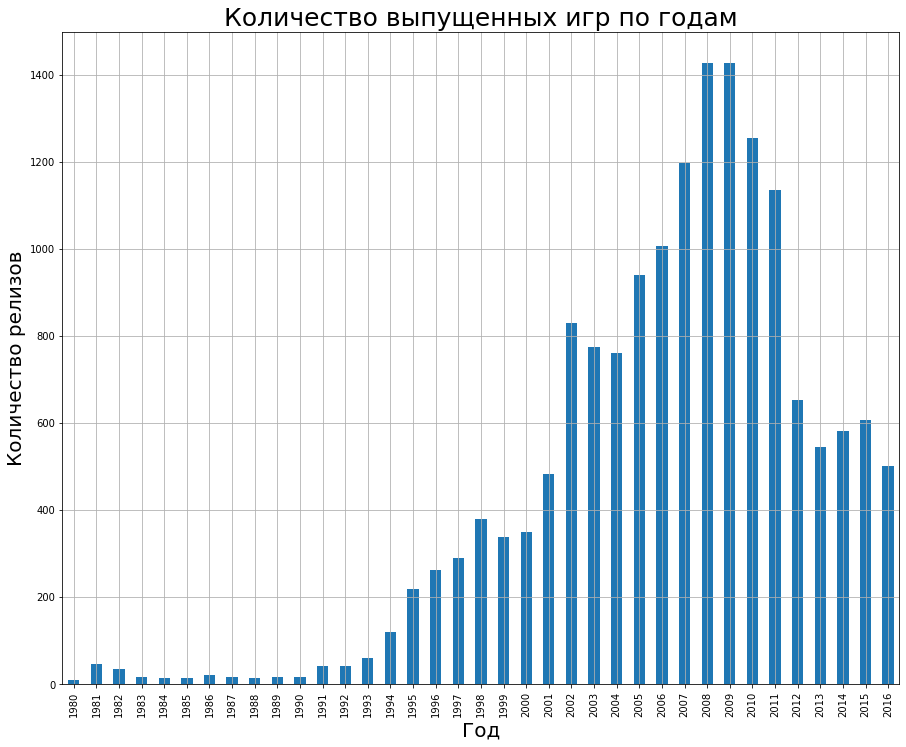

In [9]:
year_distribution = df.pivot_table(index = 'year_of_release', values = 'platform', aggfunc = 'count')
year_distribution.plot(y = 'platform', kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Количество выпущенных игр по годам', loc = 'center', fontsize = 25)
plt.ylabel('Количество релизов', size = 20)
plt.xlabel('Год', size = 20)
plt.show()

Занимательно, что пик релизов пришелся на 2008-2010 год. В то время заговорили про "первый некстген" на ПК, главенствовали PS3 и XBox 360. Но много релизов не всегда хорошо, порой количество не бьется с качеством. Но об этом позже, далее предстоит проверить, какие платформы самые прибыльные.

In [10]:
sales_by_platform = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(
    by = 'total_sales', ascending = False).head(20)
display(sales_by_platform)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


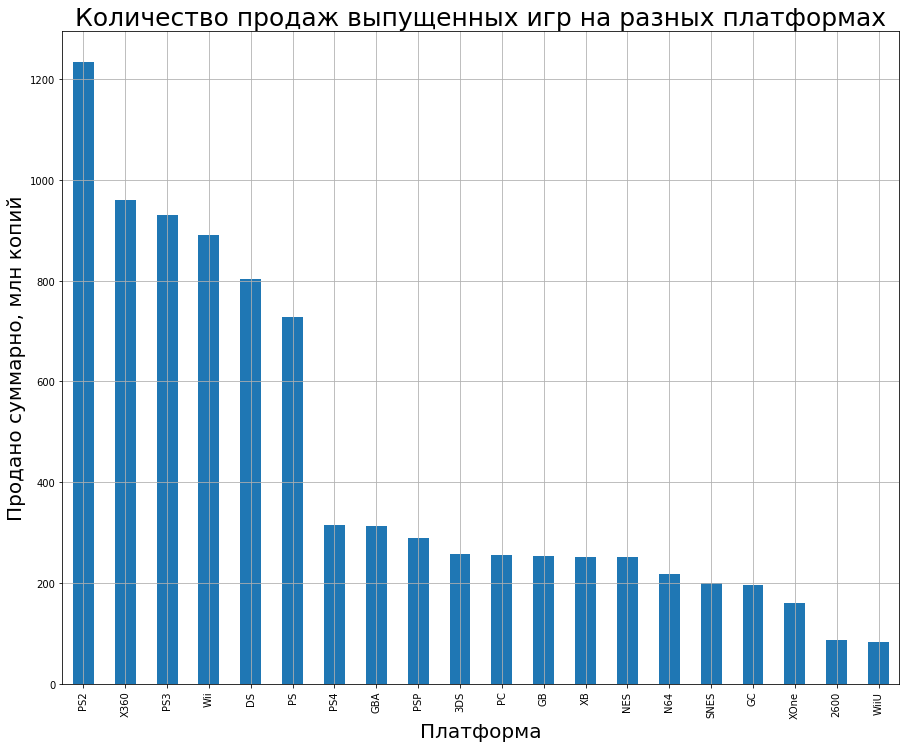

In [11]:
sales_by_platform.plot(y = 'total_sales', kind = 'bar', grid = True,legend = False, figsize = (15,12))
plt.title('Количество продаж выпущенных игр на разных платформах', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Платформа', size = 20)
plt.show()

Самыми продаваемыми стали релизы для PS2, следующими расположились XBox 360 и PS3. Второе и третье место вполне логичны, приставки появились на свет примерно в 2006-2007 годах, как раз во время пика релизов, и отошли на второй план как раз чуть позже ощутимого спада. А вот с первым местом ситуация неоднозначная. С одной стороны, приставка и правда легендарная, её прямой конкурент XBox и рядом не стоит. С другой, как я и говорил ранее, несмотря на меньшее количество релизов, качество оных явно было на высоте, что привело не самого ожидаемого конкурента в нашей гонке на первое место. Платформы Wii и DS очень популярны в Японии, стране, которая имеет некоторый культ гейминга, так что высокий спрос на эти две платформы объясним, скорее, локальной популярностью. Далее идут PS и PS4. Первая проложила путь консолей в сердца геймеров, вторая чуть менее успешно продолжает начатое первой. Удивительно, что количество продаж для консолей актуального поколения разительно ниже. Вероятно, такое падение можно объяснить удорожанием разработки игр и, как следствие, увеличению цен на игры. Более того, чтобы запустить действительно успешный проект на таких консолях, разработчикам придется попотеть, время на разработку существенно увеличивается, что приводит к большим паузам между релизами.Следующие несколько платформ, включая ПК, практически идут вровень друг с другом несмотря на то, что ПК не имеет периода актуальности, а большая часть приведенных конкурентов имели известность, порой, весьма локальную(разумеется, не все).

Чтож, Посмотрим теперь, как на самых популярных платформах менялось количество продаж в зависимости от времени.

In [12]:
sales_by_platform_and_year = pd.DataFrame(df.query('platform in @sales_by_platform.index').groupby(
    ['platform','year_of_release'])['total_sales'].sum().reset_index())
sales_by_platform_and_year.columns = ['platform', 'year', 'sales']
display(sales_by_platform_and_year.sample(10))
display(sales_by_platform_and_year.info())

,platform,year,sales
16,DS,1985,0.02
76,PC,1992,3.03
11,3DS,2012,51.36
97,PC,2014,13.28
147,PSP,2014,0.24
15,3DS,2016,15.14
128,PS3,2012,107.36
78,PC,1995,4.22
92,PC,2009,16.91
185,X360,2015,11.96


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
platform    200 non-null object
year        200 non-null int64
sales       200 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


None

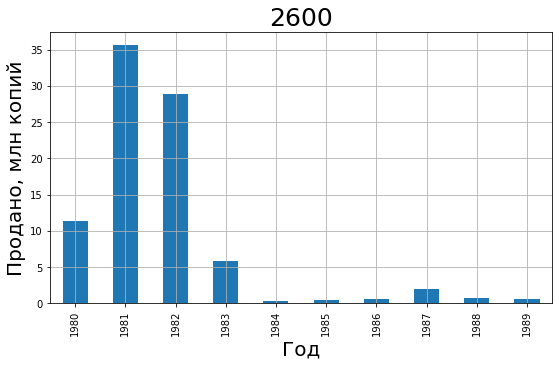

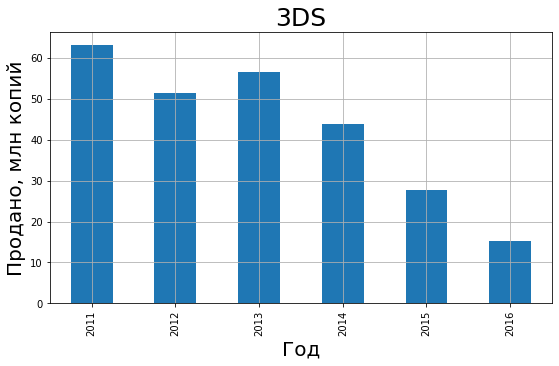

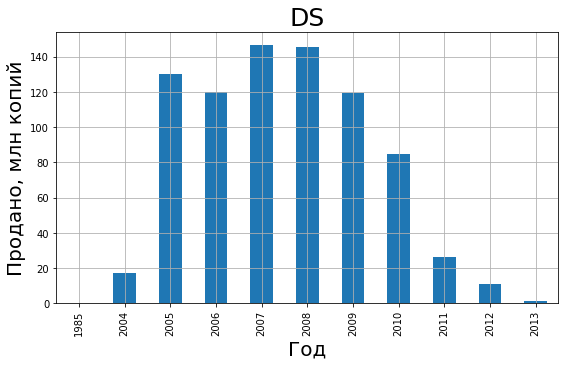

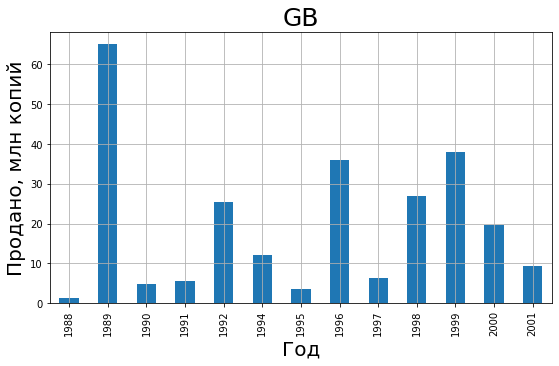

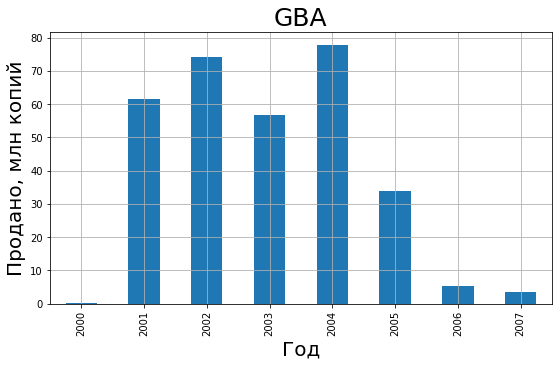

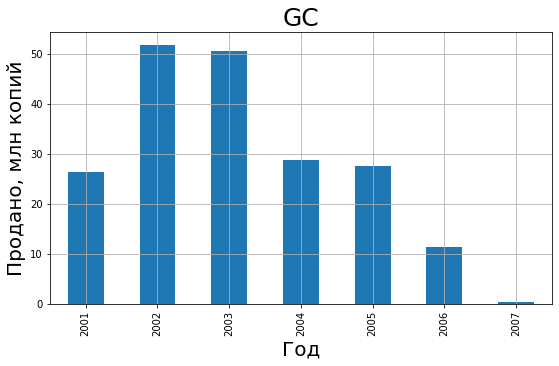

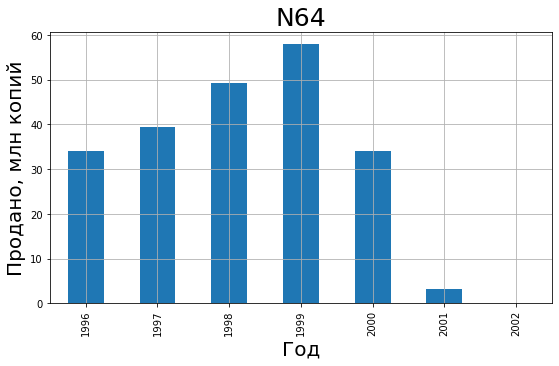

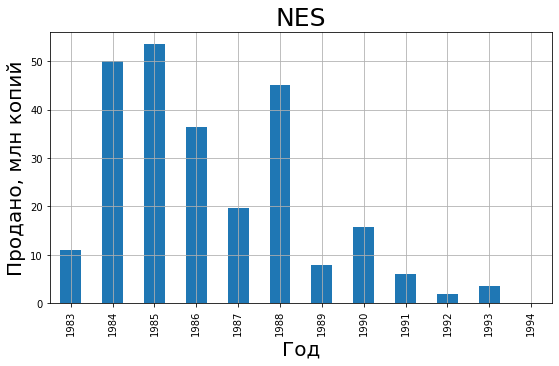

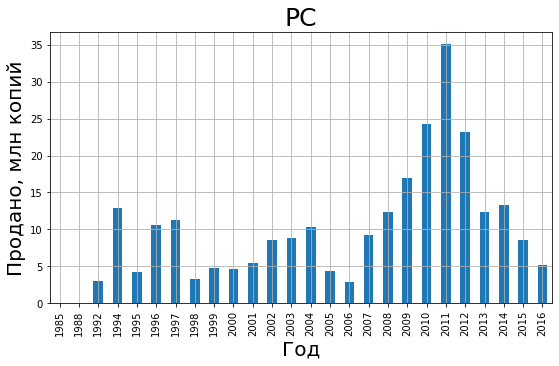

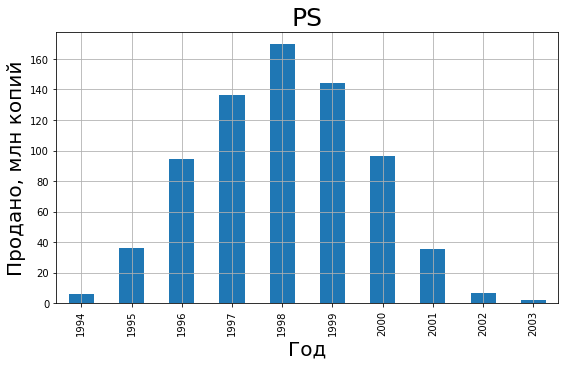

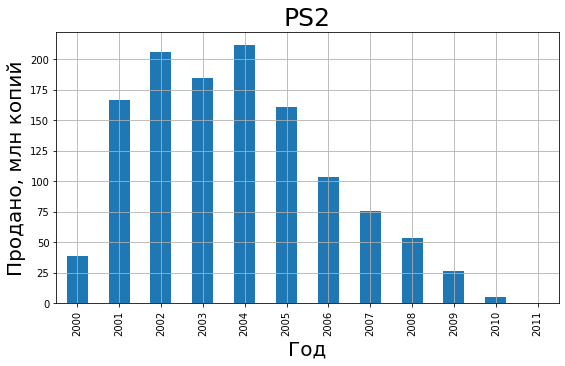

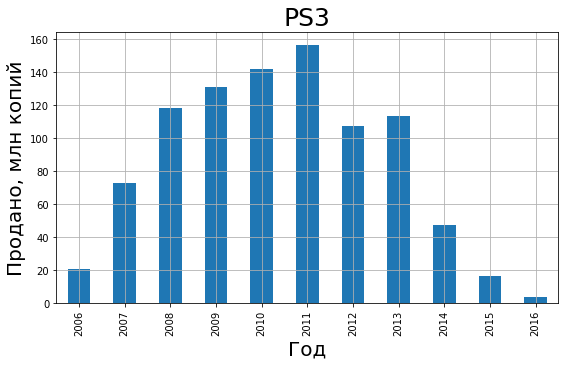

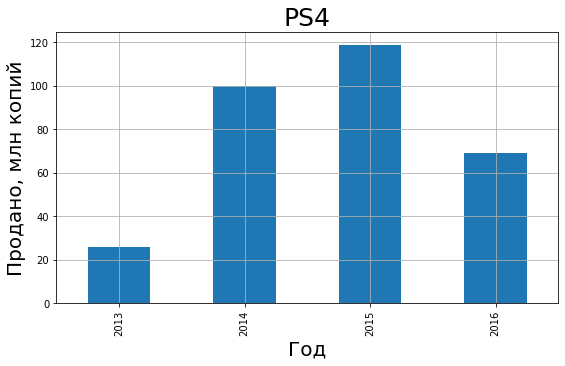

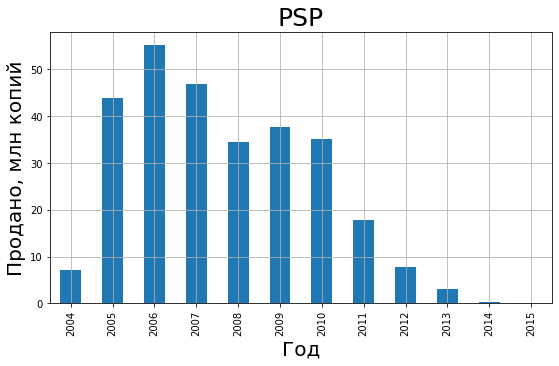

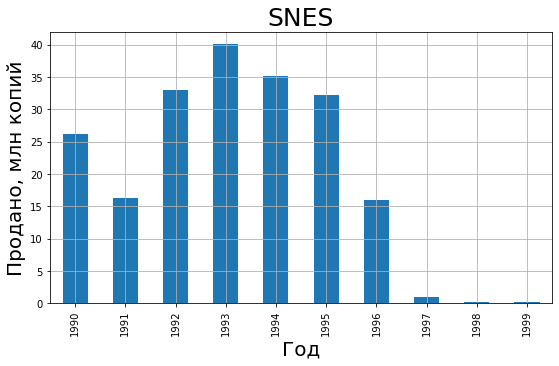

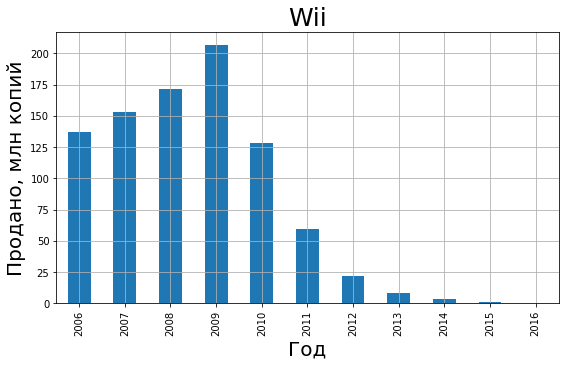

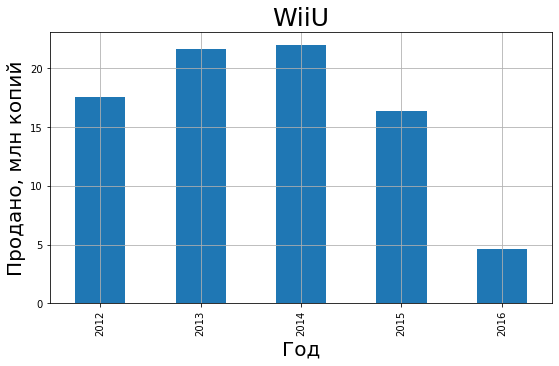

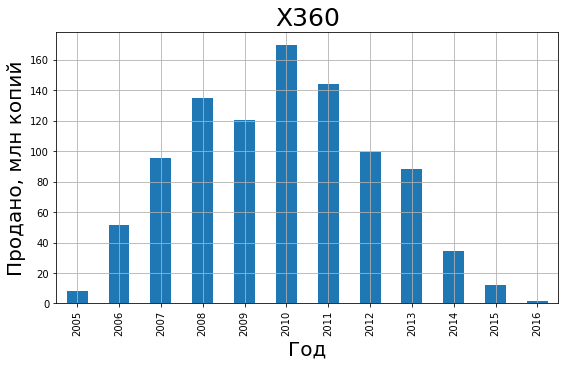

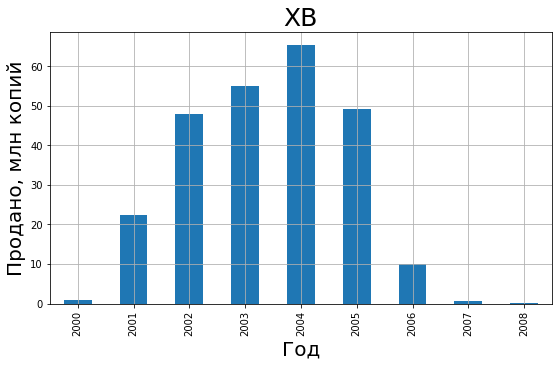

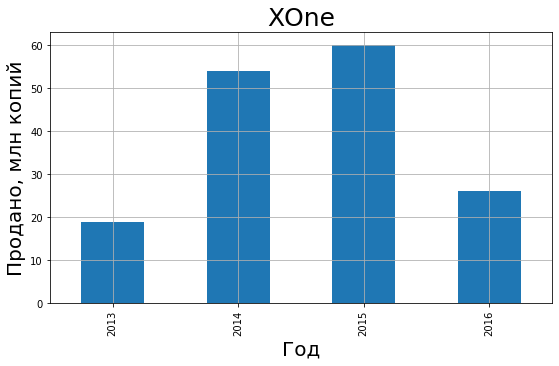

In [13]:
for name, platform_data in sales_by_platform_and_year.groupby('platform'):
    platform_data.plot(y = 'sales',x = 'year', kind = 'bar', grid = True, legend = False, figsize = (9, 5))
    plt.title(name, loc = 'center', fontsize = 25)
    plt.ylabel('Продано, млн копий', size = 20)
    plt.xlabel('Год', size = 20)
    plt.show()

Интересная ситуация сложилась. Картина для каждой платформы отличается от предыдущих. Есть и успехи на старте с резкими падениями буквально на следующий год(GB, 2600). Есть и вялый старт с последующим ростом (XOne, PS4), есть почти идеально нормалоьно распределенные диаграммы (PS). Самой долгоживущей платформой оказался ПК, так как у него нет срока актуальности. На графике продаже есть несколько пиков, приходившихся на некоторый новый шаг в индустрии игр, однако самый большой скачок наблюдается примерно одновременно с общим пиком(на самом деле немного позже, когда продажи на PS3 и XBox 360 начали падать. В среднем, консоли, которые были в "тренде" живут 10 лет. Новое поколение еще столько времени не прожило, для них актуальный перидод еще не окончен, а срок жизни составляет 4 года. ПК вне сроков давности. А локальные консоли умирали быстрее своих братьев, в среднем за 5 лет. С этой информацией можно сделать первые заключения. Например, чтобы подробнее разобраться в том, как делать "хорошо", актуализируем период анализа. Чтобы захватить "золотое времяя индустрии" стоит учесть пик игротворения, поэтому актуальным периодом будем рассматривать последние ~~8~~ 5 лет.

In [14]:
df_normalised = df.query('year_of_release > 2011 and platform in @sales_by_platform.index')
display(df_normalised.sample(10))
display(df_normalised.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16135,Super Stardust Ultra VR,PS4,2016,Shooter,0.00,0.01,0.00,0.00,66.0,6.2,E10+,0.01
16024,Gaku ? Ou: The Royal Seven Stars,PSP,2012,Role-Playing,0.00,0.00,0.02,0.00,0.0,0.0,RP,0.02
2784,Dragon Age: Inquisition,PC,2014,Role-Playing,0.33,0.34,0.00,0.06,85.0,5.9,M,0.73
15294,Azada,3DS,2012,Puzzle,0.00,0.02,0.00,0.00,0.0,0.0,E,0.02
1765,Medal of Honor: Warfighter,X360,2012,Action,0.59,0.45,0.01,0.10,53.0,5.4,M,1.15
13313,Utawarerumono: Itsuwari no Kamen,PS3,2015,Adventure,0.00,0.00,0.05,0.00,0.0,0.0,RP,0.05
5926,Lego Star Wars: The Force Awakens,XOne,2016,Action,0.14,0.13,0.00,0.02,76.0,7.0,E10+,0.29
16110,Valentino Rossi: The Game,PC,2016,Racing,0.00,0.01,0.00,0.00,72.0,6.2,E,0.01
730,LEGO Marvel Super Heroes,X360,2013,Action,1.24,0.79,0.00,0.19,80.0,7.6,E10+,2.22
13895,Hyperdimension Neptunia Victory II,PS4,2015,Role-Playing,0.00,0.00,0.04,0.00,0.0,0.0,RP,0.04


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 16 to 16710
Data columns (total 12 columns):
name               2475 non-null object
platform           2475 non-null object
year_of_release    2475 non-null int64
genre              2475 non-null object
na_sales           2475 non-null float64
eu_sales           2475 non-null float64
jp_sales           2475 non-null float64
other_sales        2475 non-null float64
critic_score       2475 non-null float64
user_score         2475 non-null float64
rating             2475 non-null object
total_sales        2475 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 251.4+ KB


None

Получилось почти 2500 игр. Продолжим работу с этой выборкой.

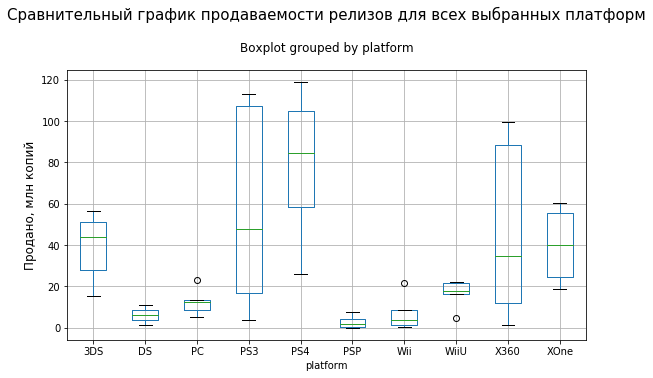

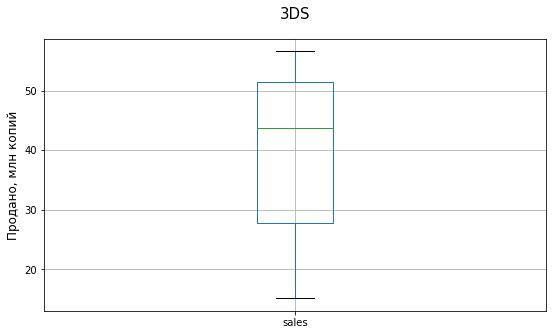

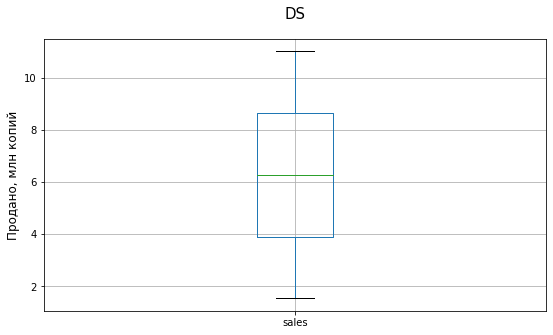

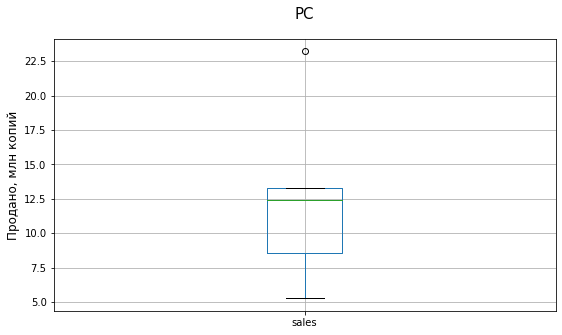

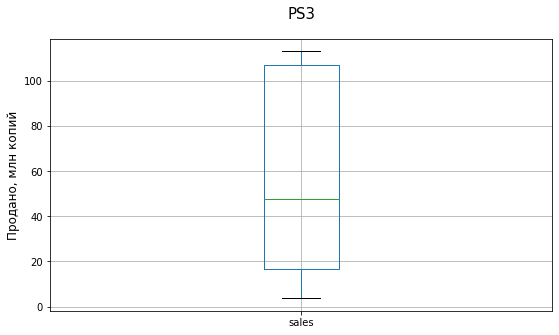

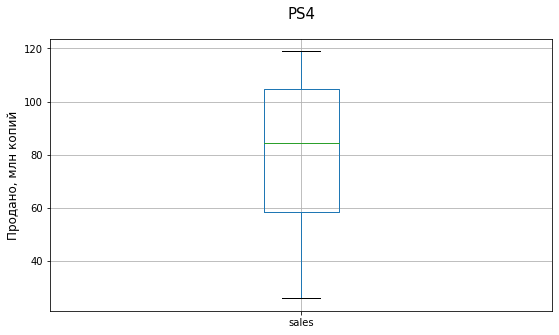

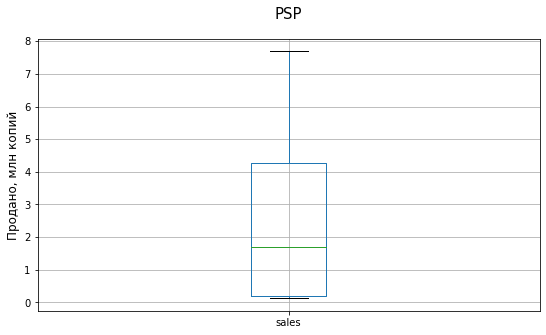

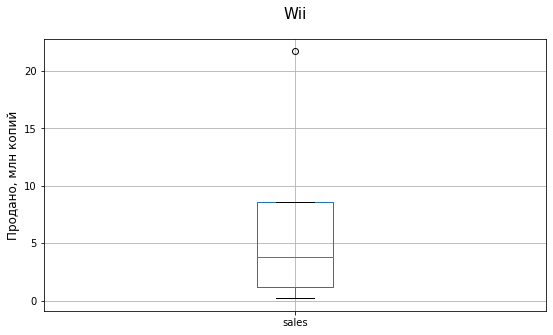

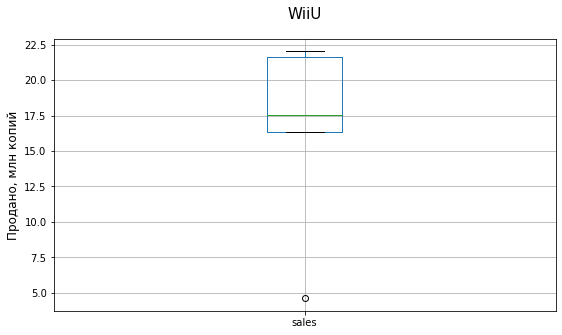

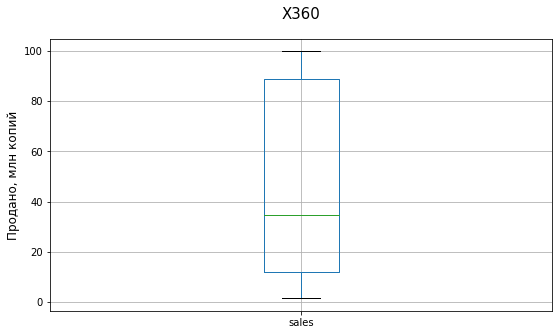

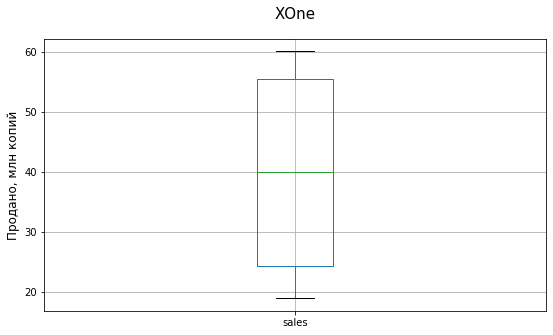

In [15]:
sales_by_platform_and_year_normalised = df_normalised.pivot_table(index = ['platform', 
                                            'year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
sales_by_platform_and_year_normalised.columns = ['platform','year','sales']
#display(sales_by_platform_and_year_normalised)
sales_by_platform_and_year_normalised.boxplot('sales', by='platform', grid = True, figsize = (9, 5))
plt.title('Сравнительный график продаваемости релизов для всех выбранных платформ', loc = 'center', fontsize = 15, pad = 50)
plt.ylabel('Продано, млн копий', size = 12)
plt.show()
for name, data in sales_by_platform_and_year_normalised.groupby('platform'):
    data.boxplot('sales',grid = True, figsize = (9, 5))
    plt.title(name, loc = 'center', fontsize = 15, pad = 20)
    plt.ylabel('Продано, млн копий', size = 12)
    plt.show()

Самыми успешными оказались PS3,4 и XBox360, их медианные значения продаж самые высокие. Абсолютный фаворит PS3, её медианное зачение продаж перевалило за 100 млн копий. Остальные, не вошедшие в тройку лидеров, платформы не могут похвастаться подобными успехами: ни один из претендентов не перевалил(в медианном значении) за отметку в 50 млн копий. Кроме этого, на полученных графиках видно, что чем менее популярна платформа, тем более локально сгруппированы "ящики с усами". Маленикие отклонения, значения квартилей находятся рядом. Значит, чтобы приблизиться к успеху в 2017м году нам нужно сосредоточиться на успехе нескольких уже отошедших платформ и одной актуальной на данный момент.

Посмотрим теперь на влияние рейтингов и оценок на продажи. Для этого анализа я взял ПК, так как эта платформа живет дольше всего.

In [16]:
sales_on_pc = df_normalised.query('platform == "PC" and critic_score != 0 and user_score != 0 and rating != "RP"').reset_index().drop(['index'], axis = 1)
display(sales_on_pc)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
1,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
2,Guild Wars 2,PC,2012,Action,0.96,1.07,0.0,0.27,90.0,7.9,T,2.30
3,World of Warcraft: Mists of Pandaria,PC,2012,Role-Playing,0.84,0.76,0.0,0.22,82.0,4.8,T,1.82
4,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
169,Sherlock Holmes: The Devil's Daughter,PC,2016,Adventure,0.00,0.01,0.0,0.00,65.0,7.3,T,0.01
170,TrackMania Turbo,PC,2016,Action,0.00,0.01,0.0,0.00,79.0,6.8,E,0.01
171,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
172,Transformers: Fall of Cybertron,PC,2012,Action,0.01,0.00,0.0,0.00,78.0,7.9,T,0.01


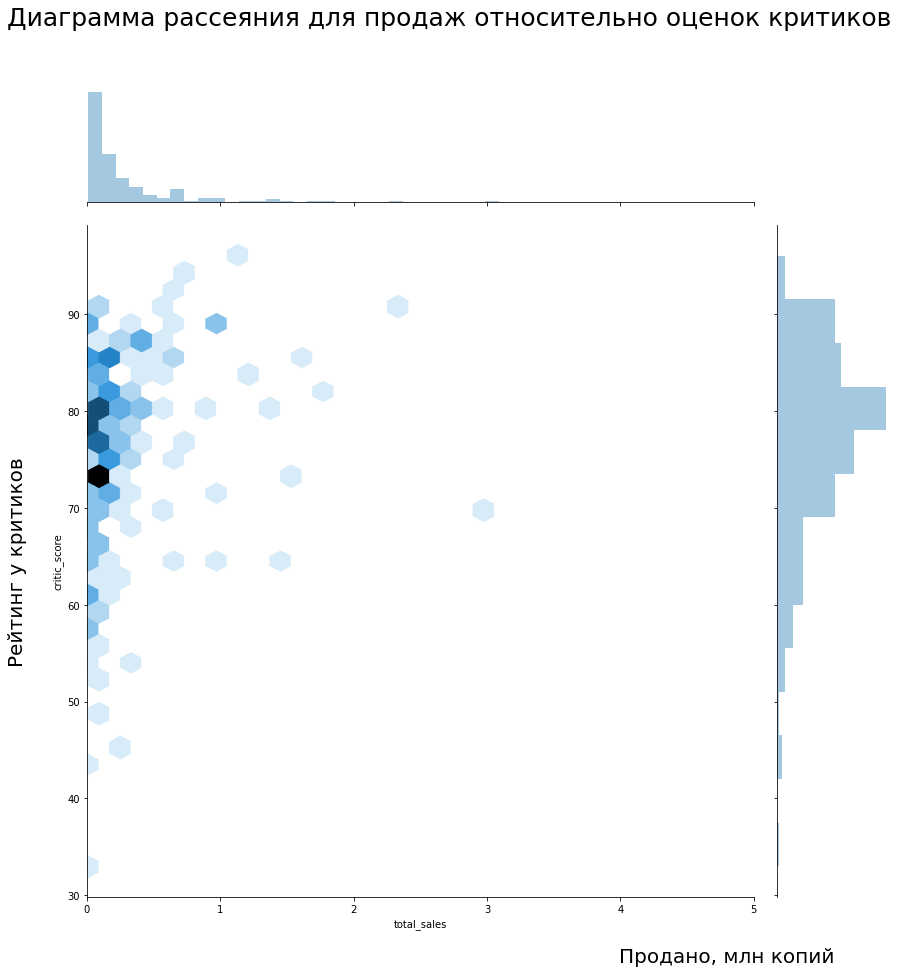

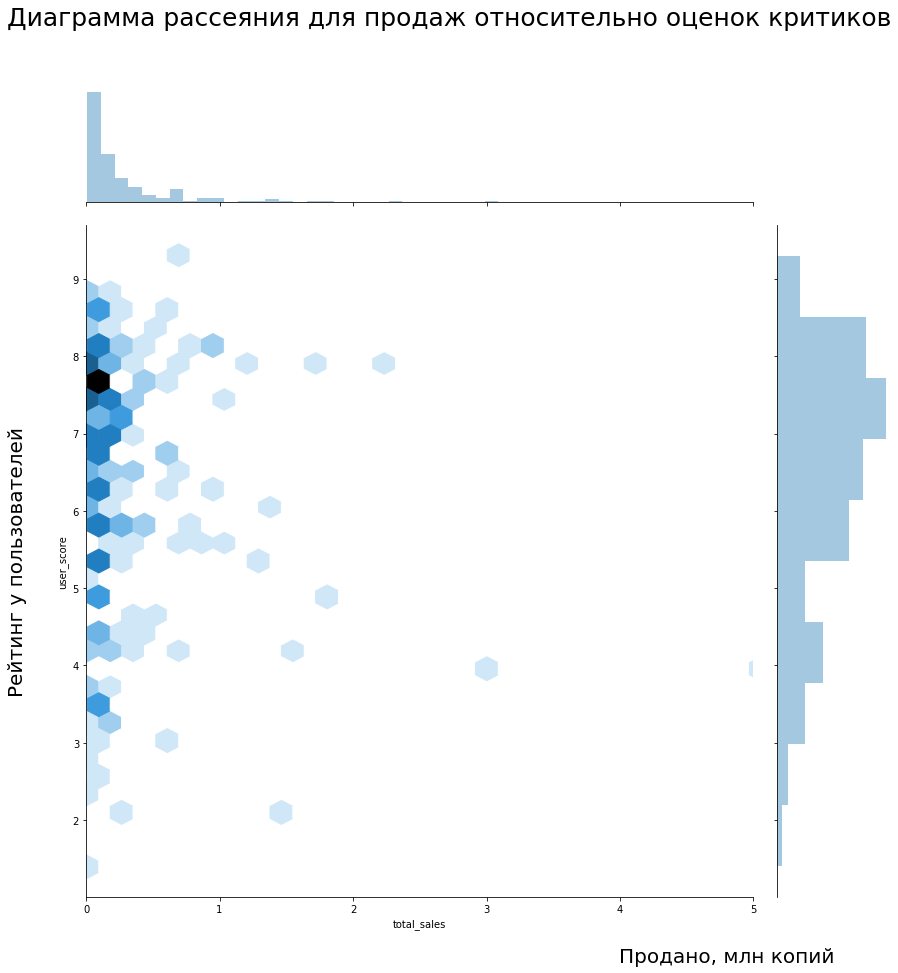

In [17]:
sns.jointplot(x = sales_on_pc['total_sales'], y = sales_on_pc['critic_score'], kind = 'hex', height=12, 
              xlim={0, 5}, ylim=None)
plt.title('Диаграмма рассеяния для продаж относительно оценок критиков', loc = 'right', fontsize = 25, pad = 200)
plt.xlabel('Продано, млн копий', size = 20, labelpad = 50, horizontalalignment = 'right')
plt.ylabel('Рейтинг у критиков', size = 20, labelpad = 750)
plt.show()
sns.jointplot(x = sales_on_pc['total_sales'], y = sales_on_pc['user_score'], kind = 'hex', height=12, 
              xlim={0, 5}, ylim=None)
plt.title('Диаграмма рассеяния для продаж относительно оценок критиков', loc = 'right', fontsize = 25, pad = 200)
plt.xlabel('Продано, млн копий', size = 20, labelpad = 50, horizontalalignment = 'right')
plt.ylabel('Рейтинг у пользователей', size = 20, labelpad = 750)
plt.show()

Критики чаще всего ставят 75 баллов, а пользователи примерно 78. Диаграмма показывает, что оценка пользователей больше влияет на спрос на игры. Кстати, о весе влияния. Посмотрим на корреляцию этих двух параметров с продажами игр на ПК. Для большей наглядности я построил карту корреляций.

In [19]:
df_from_scores = df_normalised.query('critic_score != 0 and user_score != 0')

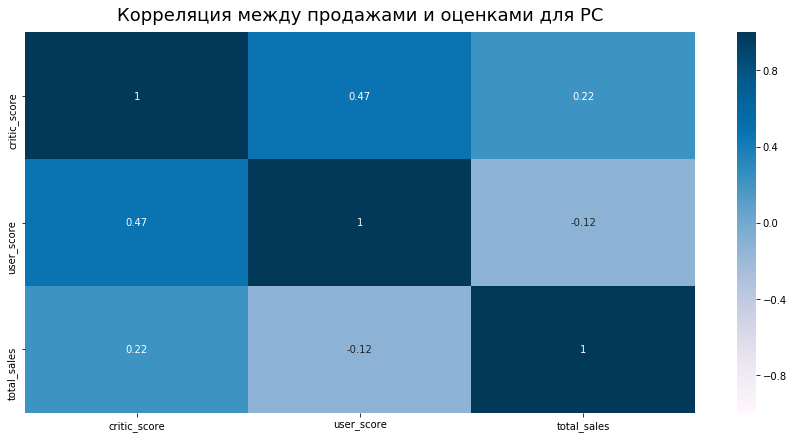

In [20]:
plt.figure(figsize=(15, 7))
heatmap = sns.heatmap(sales_on_pc[['critic_score', 'user_score', 'total_sales']].corr(), vmin=-1, vmax=1, 
                      annot=True, cmap='PuBu')
heatmap.set_title('Корреляция между продажами и оценками для РС', fontdict={'fontsize':18}, pad=12)
plt.show()

На деле оказалось, что корреляция на ПК между оценками и продажами достаточно слабая. Об этом можно было догадаться еще раз взглянув на диаграммы рассеяния. Да, большая часть сосредоточена вокруг высоких оценок, но тем не менее, продажи этих игр не так велики. Зато, встречаются с невысокими оценками и хорошим показателем продаваемости. Зато, видно, что оценка пользователей достаточно весомо зависит от оценки критиков. Да и сами продажи от оценки критиков зависят сильнее, чем от оценки пользователей. А что, если рассмотреть не одну платфору, а все?

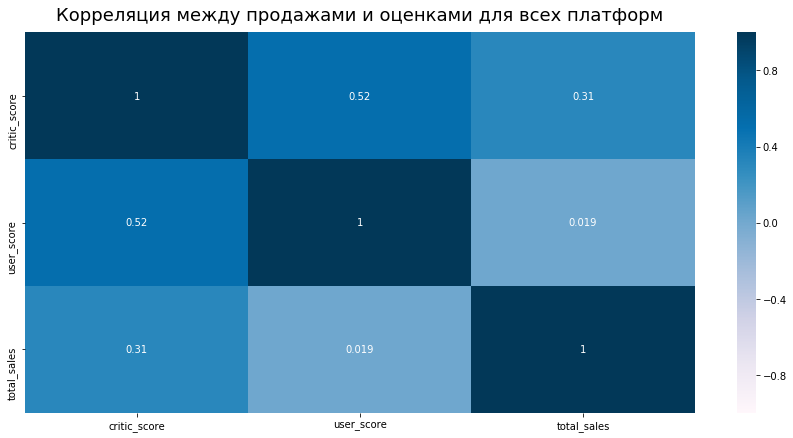

In [21]:
plt.figure(figsize=(15, 7))
heatmap = sns.heatmap(df_from_scores[['critic_score', 'user_score', 'total_sales']].corr(), vmin=-1, vmax=1, 
                      annot=True, cmap='PuBu')
heatmap.set_title('Корреляция между продажами и оценками для всех платформ', fontdict={'fontsize':18}, pad=12)
plt.show()

Числа немного переигрались, но общая картина не изменилась. Выходит, что лучше чаще прислушиваться к критикам, но не заострять особого внимания? Для верности выводов, посмотрим, как ситуация обстоит с одной из самых перспективных на данный момент платформ - PS4.

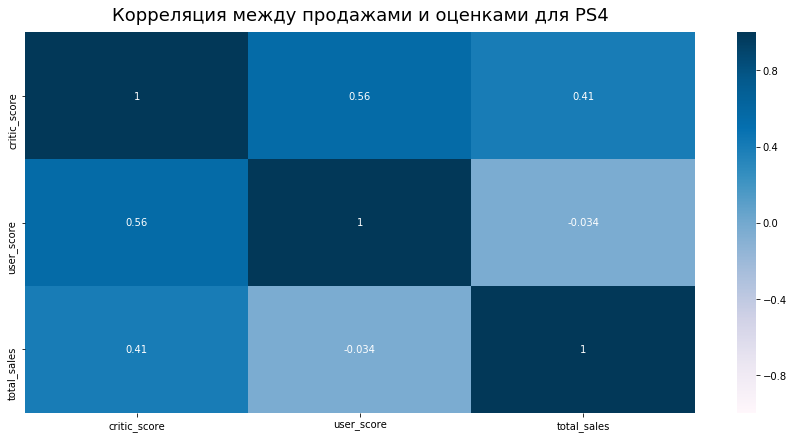

In [22]:
df_from_scores_for_ps4 = df_normalised.query('platform == "PS4" and critic_score != 0 and user_score != 0')
plt.figure(figsize=(15, 7))
heatmap = sns.heatmap(df_from_scores_for_ps4[['critic_score', 'user_score', 'total_sales']].corr(), vmin=-1, vmax=1, 
                      annot=True, cmap='PuBu')
heatmap.set_title('Корреляция между продажами и оценками для PS4', fontdict={'fontsize':18}, pad=12)
plt.show()

И снова та же картина. Однако, коэффициент корреляции между продажами и оценкой пользователей стал отрицательным. Чем хуже оценка тем чаще покупают? было бы странно, но корреляция настолько слаба, что всерьез утверждать подобное нет никаких оснований.

С платформами и оценками разобрались, а что с жанрами? проанализируем ситуацию.

In [23]:
sales_by_genre = df_normalised.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(
    by = 'total_sales', ascending = False).reset_index()
sales_by_genre.columns = ['genre', 'sales']
display(sales_by_genre)

,genre,sales
0,Action,424.79
1,Shooter,302.39
2,Role-Playing,180.75
3,Sports,177.86
4,Misc,80.72
5,Platform,58.74
6,Racing,51.29
7,Fighting,42.28
8,Simulation,35.07
9,Adventure,25.64


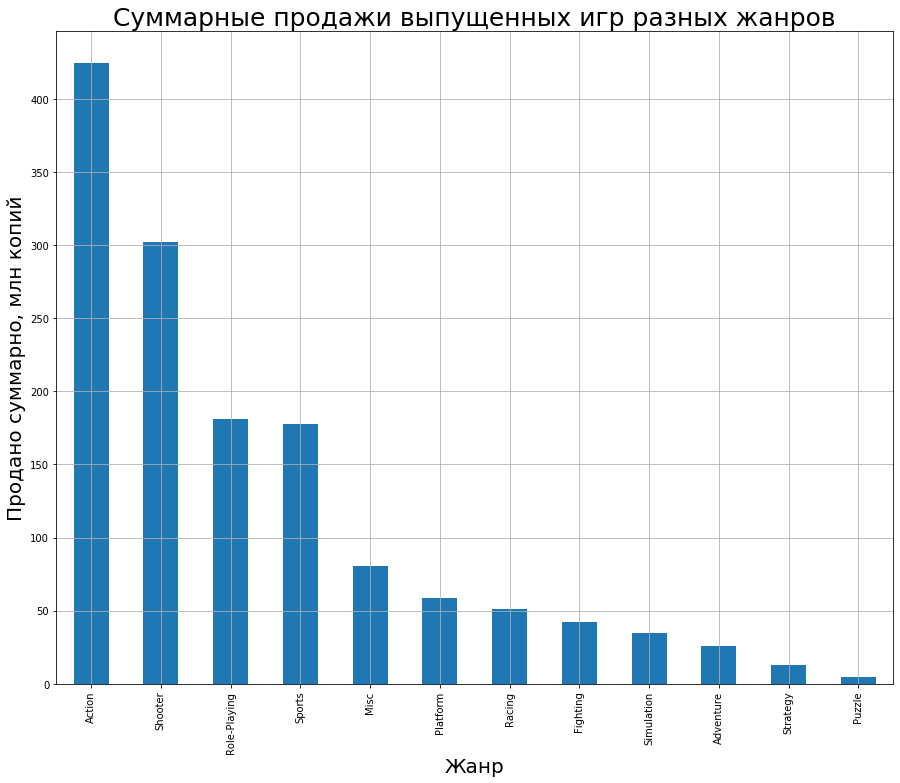

In [24]:
sales_by_genre.plot(y = 'sales', x = 'genre', kind = 'bar', grid = True,legend = False, figsize = (15,12))
plt.title('Суммарные продажи выпущенных игр разных жанров', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Жанр', size = 20)
plt.show()

Самыми поупляными жанрами оказались экшн, ролевые и спортивные игры и шутеры. Очевидно, рядовой пользователь предпочитает пострелять нечисть, посоревноваться с друзьями на виртуальном стадионе и погрузиться в гущу событий от первого лица.Меньше всего игроки любят головоломки, приключения и стратегии. Значит, стоит сосредоточиться на более активных жанрах.

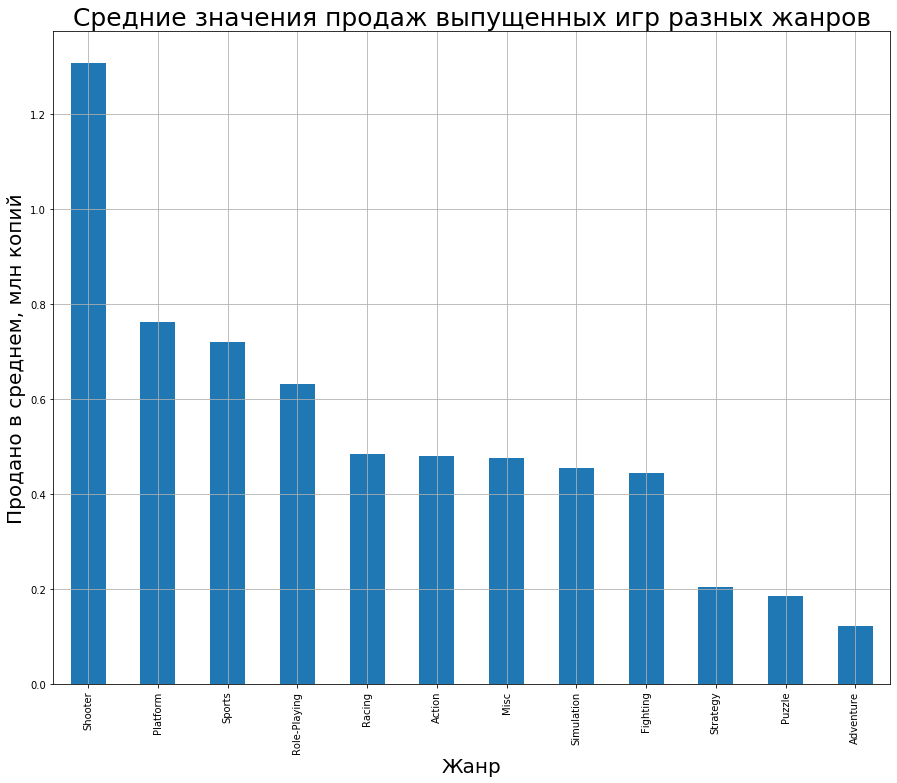

In [25]:
sales_by_genre_mean = df_normalised.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean').sort_values(
    by = 'total_sales', ascending = False).reset_index()
sales_by_genre_mean.columns = ['genre', 'sales']
sales_by_genre_mean.plot(y = 'sales', x = 'genre', kind = 'bar', grid = True,legend = False, figsize = (15,12))
plt.title('Средние значения продаж выпущенных игр разных жанров', loc = 'center', fontsize = 25)
plt.ylabel('Продано в среднем, млн копий', size = 20)
plt.xlabel('Жанр', size = 20)
plt.show()

Но если мы решим посмотреть, а как распределяться средние значения продаж игр по каждому жанру, то ситуация несколько изменится. Тут в лидеры вырываются шутеры. Далее появляется внезапно неожиданный новичок - платформер. Экшены спустились аж шестое место, уступив еще одному новичку в топе - гонкам. Такая ситуация получилась из-за наличия выбросов в некоторых платформах, которые можно пронаблюдать на графиках "ящиков с усами". Например, появление платформеров обусловлено скорее всего наблюдаемыми выбросами на плфтворе Wii(Nintendo - король платформеров), а жанр гонок выбился вперед благодаря ПК. А вот аутсайдеры остались теми же, хоть и расположились немного в другом порядке. Чтож, стратегии отыграли пару позиций только засчет ПК, вероятно, пара выбросов на этой платформе принадлежит каким-нибудь легендам данного жанра. Тем не менее, даже это популярность жанра не спасло. На что-же мы будем опираться при прогнозировании рекламной кампании? Логичнее всего будет учесть картину в целом, не забывая о том, что, например, жанр экшн выглдяит немного"оверхайпнутым" в новом свете =)

## Портрет пользователя 


Составим портер пользователя каждого региона. Что предпочитаю люди на разных концах планет: активные игры на диване перед телевизоромм, соревноваться с друзьями на портативных приставках или сидеть на кресле перед компьютером и планировать захват мира? Чтобы выяснить это мы с вами здесь и собрались. Приступим. Для каждого региона найдем топ-5 платформ и жанров.

In [26]:
na_users = df.query('na_sales != 0')
eu_users = df.query('eu_sales != 0')
jp_users = df.query('jp_sales != 0')
other_users = df.query('other_sales != 0')

In [27]:
na_stats_by_platform = na_users.groupby('platform')['na_sales'].sum().reset_index(
    ).sort_values(by = 'na_sales', ascending = False).reset_index().drop('index', axis = 1).head(5)
display(na_stats_by_platform)

,platform,na_sales
0,X360,595.74
1,PS2,572.92
2,Wii,486.87
3,PS3,390.13
4,DS,380.31


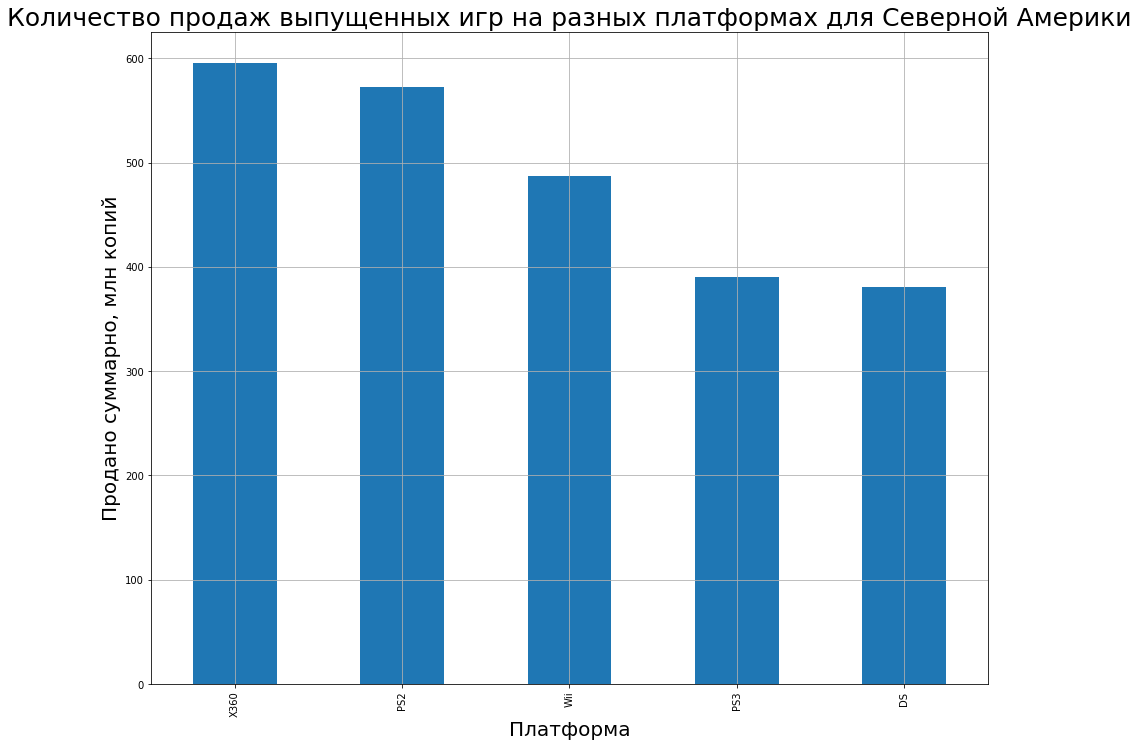

In [28]:
na_stats_by_platform.plot(x = 'platform', y = 'na_sales', kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Количество продаж выпущенных игр на разных платформах для Северной Америки', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Платформа', size = 20)
plt.show()

In [29]:
na_stats_by_genre = na_users.groupby('genre')['na_sales'].sum().reset_index(
    ).sort_values(by = 'na_sales', ascending = False).reset_index().drop('index', axis = 1).head(5)
display(na_stats_by_genre)

,genre,na_sales
0,Action,863.17
1,Sports,671.20
2,Shooter,584.83
3,Platform,444.44
4,Misc,399.57


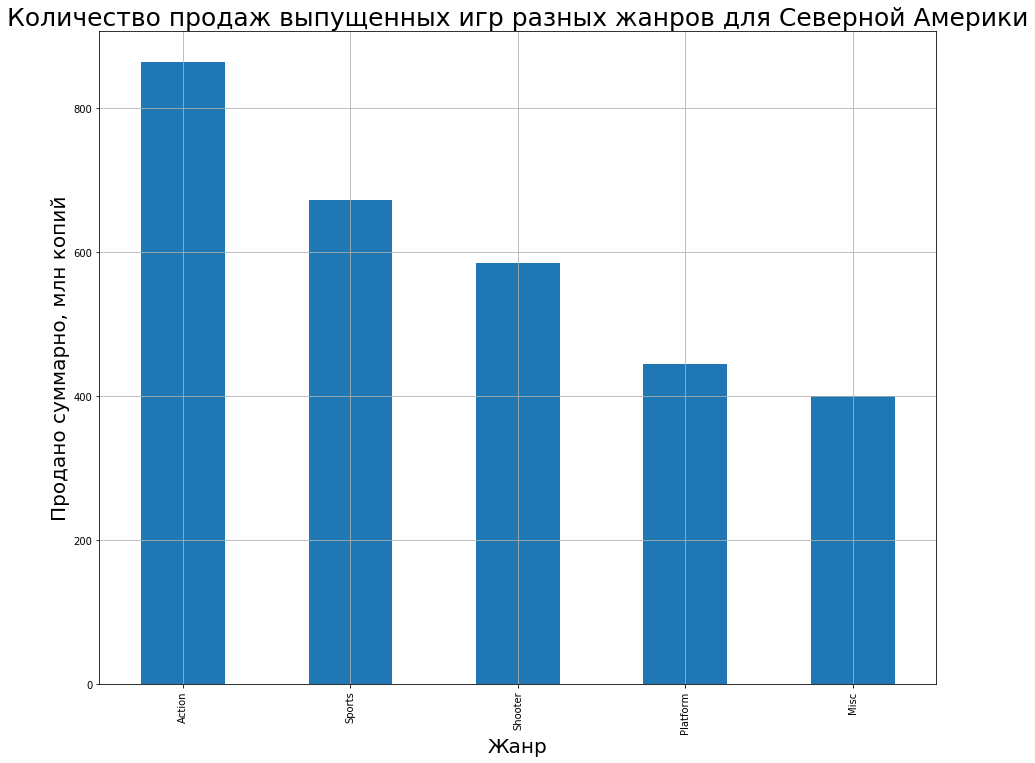

In [30]:
na_stats_by_genre.plot(x = 'genre', y = 'na_sales', kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Количество продаж выпущенных игр разных жанров для Северной Америки', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Жанр', size = 20)
plt.show()

Жители СМеверной Америки предпочитают сидеть на диване перед телевизором и погружаться в самую гущу событий. Любимая платформа XBox360, а жанр - экшн.

In [31]:
eu_stats_by_platform = eu_users.groupby('platform')['eu_sales'].sum().reset_index(
    ).sort_values(by = 'eu_sales', ascending = False).reset_index().drop('index', axis = 1).head(5)
display(eu_stats_by_platform)

,platform,eu_sales
0,PS2,332.63
1,PS3,327.21
2,X360,268.32
3,Wii,258.32
4,PS,212.39


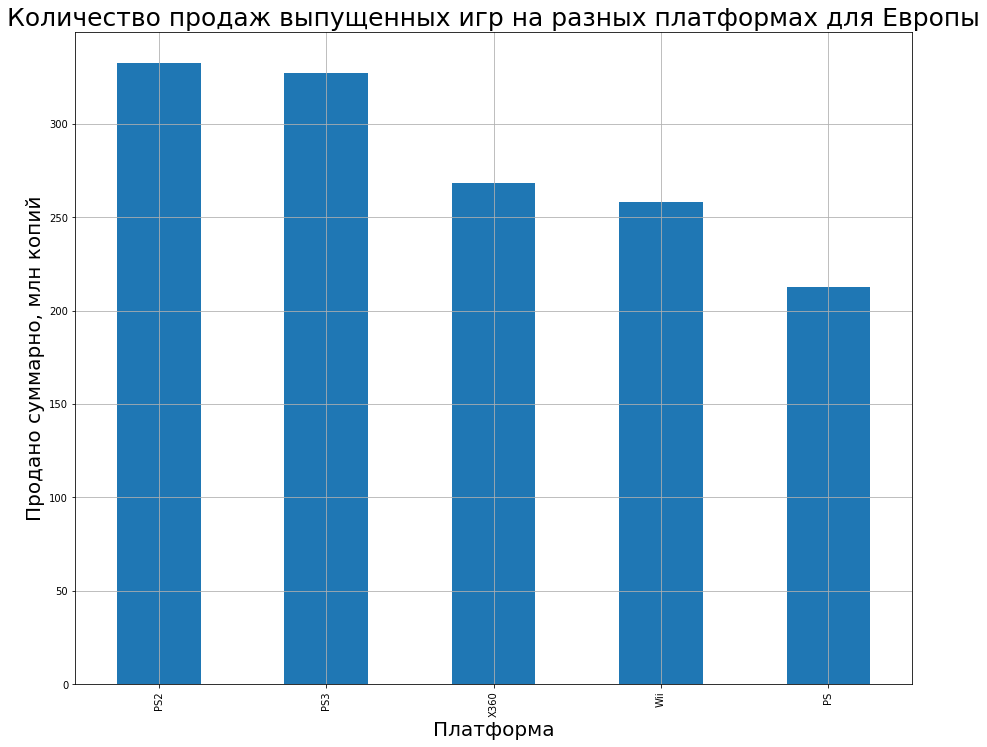

In [32]:
eu_stats_by_platform.plot(x = 'platform', y = 'eu_sales', kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Количество продаж выпущенных игр на разных платформах для Европы', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Платформа', size = 20)
plt.show()

,genre,eu_sales
0,Action,510.99
1,Sports,371.33
2,Shooter,314.52
3,Racing,234.49
4,Misc,210.60


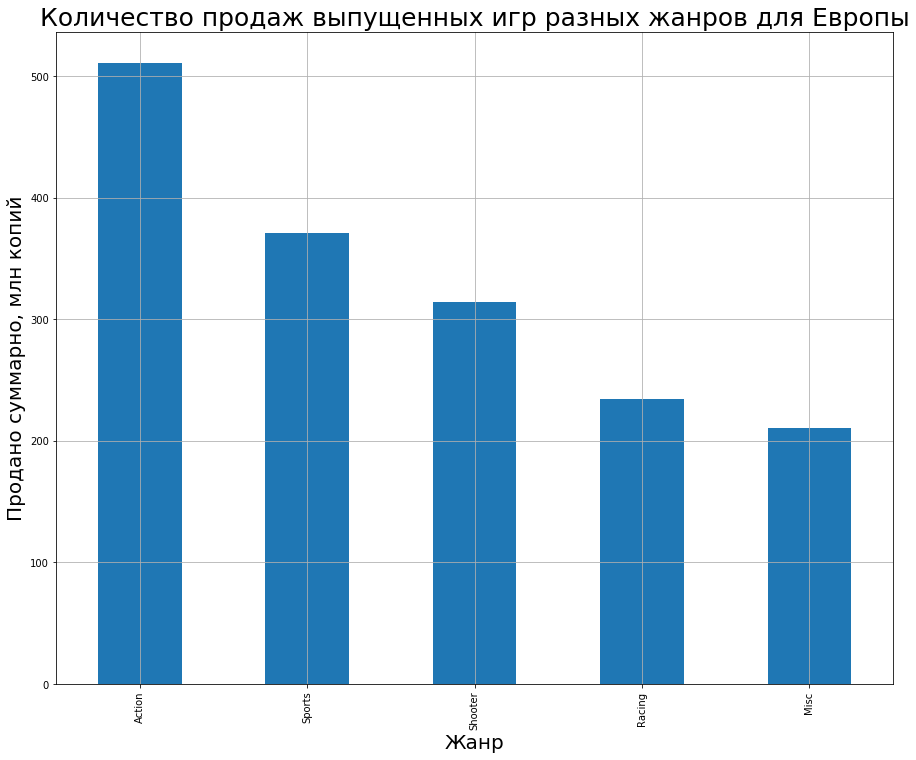

In [33]:
eu_stats_by_genre = eu_users.groupby('genre')['eu_sales'].sum().reset_index(
    ).sort_values(by = 'eu_sales', ascending = False).reset_index().drop('index', axis = 1).head(5)
display(eu_stats_by_genre)
eu_stats_by_genre.plot(x = 'genre', y = 'eu_sales', kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Количество продаж выпущенных игр разных жанров для Европы', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Жанр', size = 20)
plt.show()

Жители Европейского региона предпочитают XBox-у конкурента из японии всех поколений, а топ жанров аналогичен американскому.

,platform,jp_sales
0,DS,175.02
1,PS,139.78
2,PS2,137.54
3,SNES,116.55
4,3DS,100.62


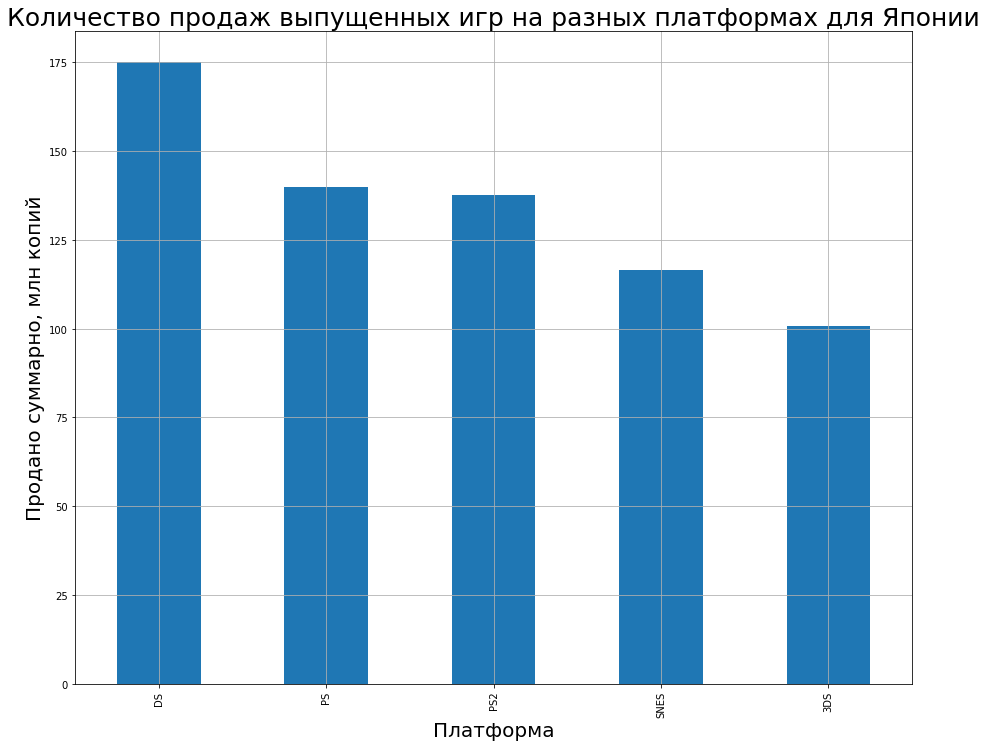

In [34]:
jp_stats_by_platform = jp_users.groupby('platform')['jp_sales'].sum().reset_index(
    ).sort_values(by = 'jp_sales', ascending = False).reset_index().drop('index', axis = 1).head(5)
display(jp_stats_by_platform)
jp_stats_by_platform.plot(x = 'platform', y = 'jp_sales', kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Количество продаж выпущенных игр на разных платформах для Японии', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Платформа', size = 20)
plt.show()

,genre,jp_sales
0,Role-Playing,353.39
1,Action,160.14
2,Sports,134.93
3,Platform,130.71
4,Misc,107.02


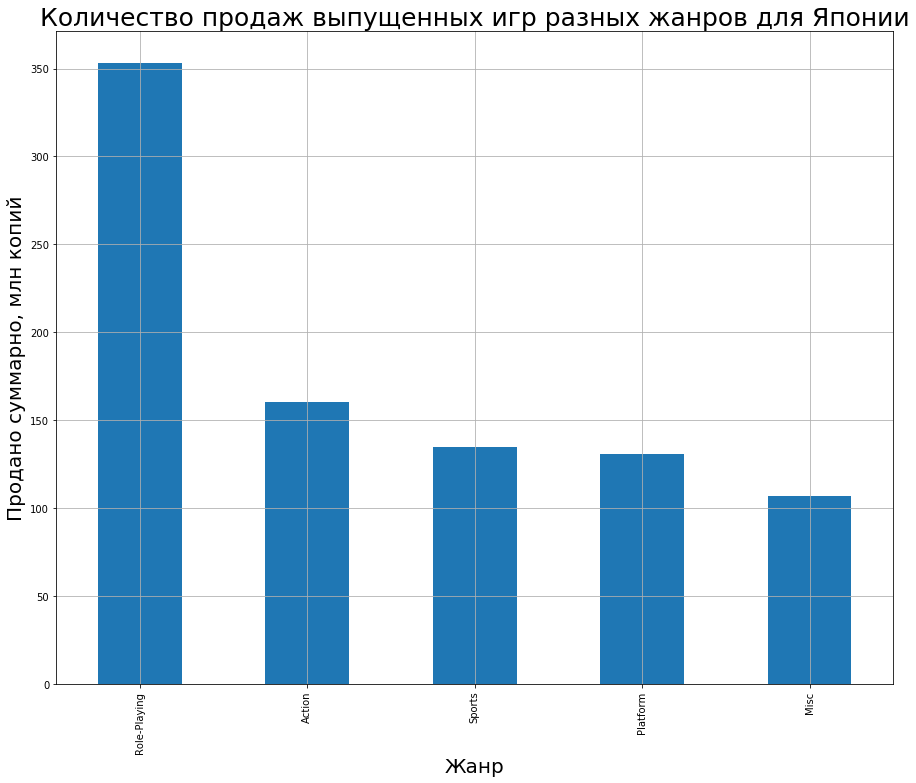

In [35]:
jp_stats_by_genre = jp_users.groupby('genre')['jp_sales'].sum().reset_index(
    ).sort_values(by = 'jp_sales', ascending = False).reset_index().drop('index', axis = 1).head(5)
display(jp_stats_by_genre)
jp_stats_by_genre.plot(x = 'genre', y = 'jp_sales', kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Количество продаж выпущенных игр разных жанров для Японии', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Жанр', size = 20)
plt.show()

Япония, как обычно, выделяется из всех. Японцы предпочитают Sony и Nintendo, но жанр РПГ с существенным отрывом занимает первое место.

,platform,other_sales
0,PS2,190.47
1,PS3,134.59
2,X360,84.88
3,Wii,77.71
4,DS,59.04


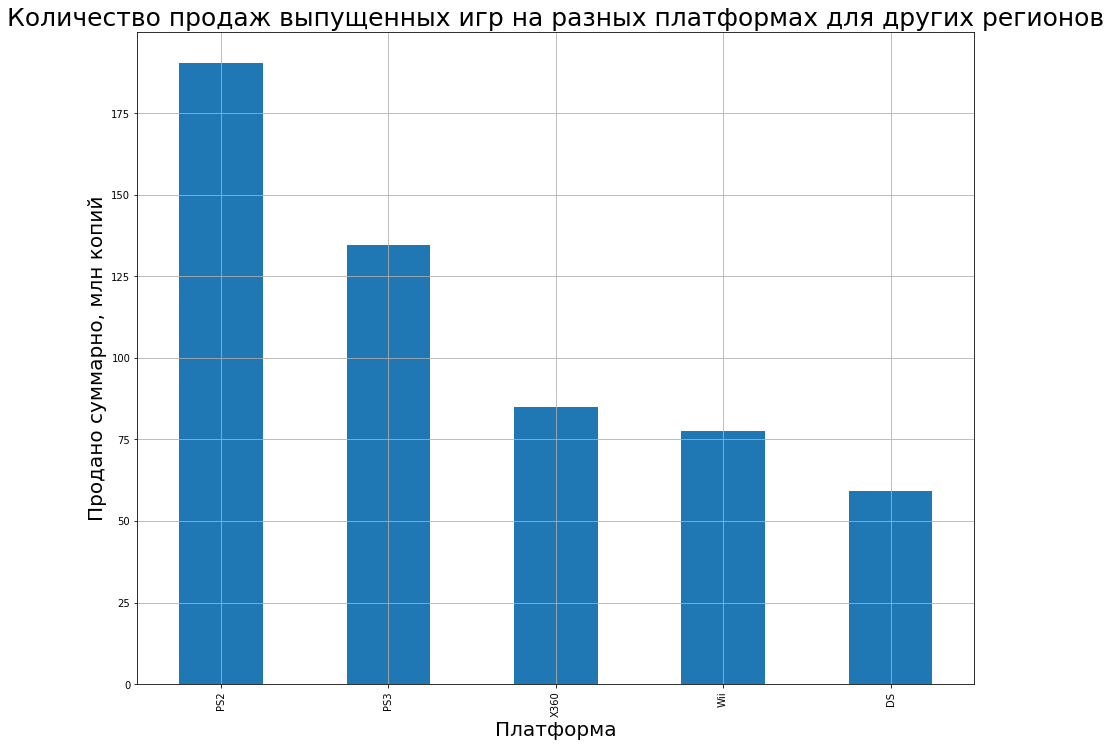

In [36]:
other_stats_by_platform = other_users.groupby('platform')['other_sales'].sum().reset_index(
    ).sort_values(by = 'other_sales', ascending = False).reset_index().drop('index', axis = 1).head(5)
display(other_stats_by_platform)
other_stats_by_platform.plot(x = 'platform', y = 'other_sales', kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Количество продаж выпущенных игр на разных платформах для других регионов', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Платформа', size = 20)
plt.show()

,genre,other_sales
0,Action,182.22
1,Sports,132.21
2,Shooter,103.33
3,Racing,75.51
4,Misc,73.10


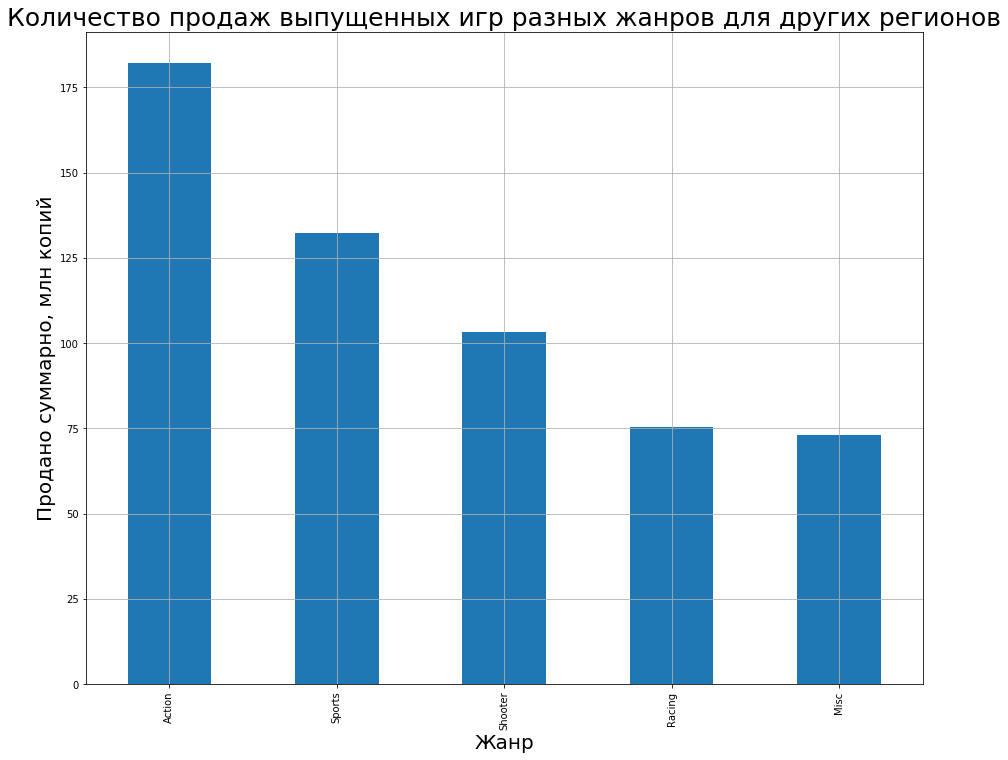

In [37]:
other_stats_by_genre = other_users.groupby('genre')['other_sales'].sum().reset_index(
    ).sort_values(by = 'other_sales', ascending = False).reset_index().drop('index', axis = 1).head(5)
display(other_stats_by_genre)
other_stats_by_genre.plot(x = 'genre', y = 'other_sales', kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Количество продаж выпущенных игр разных жанров для других регионов', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Жанр', size = 20)
plt.show()

Средний игрок из остальных регионов больше похож на американского и европейского, нежели на японского. Эти различия стоит учесть при планировании рекламной кампании для разных регионов на 2017 год.

А что с рейтингом, как он влияет на продажи? давайте взглянем на диаграмму ниже.

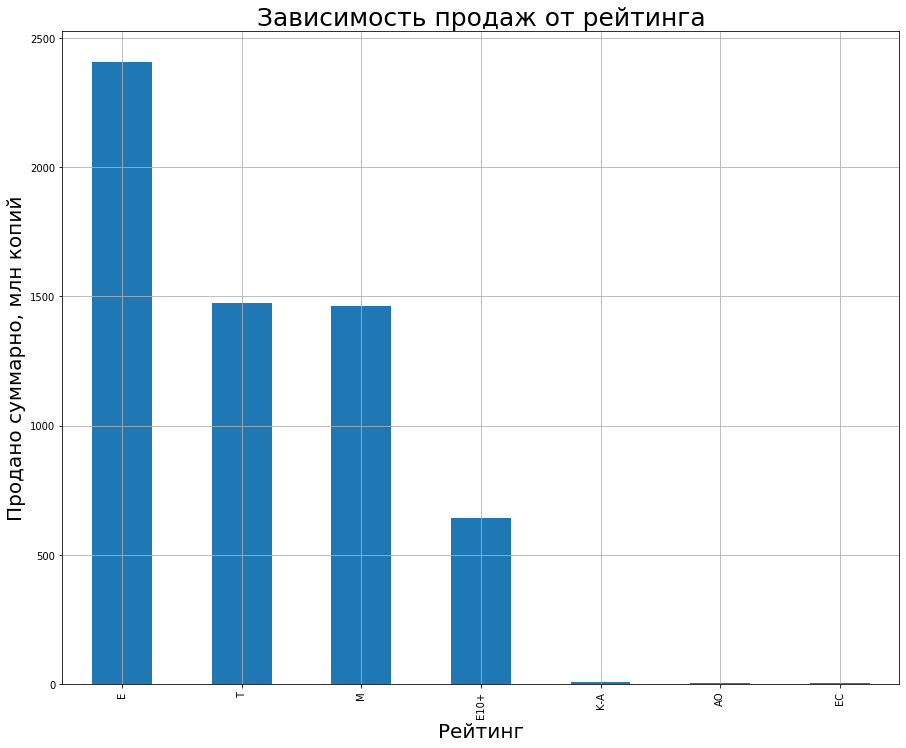

In [38]:
df_by_rating = df.query('rating != "RP"').groupby('rating')['total_sales'].sum().reset_index(
    ).sort_values(by = 'total_sales', ascending = False).reset_index().drop('index', axis = 1)
df_by_rating.plot(x = 'rating', y = 'total_sales', kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Зависимость продаж от рейтинга', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Рейтинг', size = 20)
plt.show()

Самые популярные релизы предназначались для всех, ощутимо большие показатели для игр с рейтингом не строго ограничивающим аудиторию( для подростков, для детей старше 10 и т.д.). Большим спросом пользуют игры для взрослой аудитории. Игры со значительными ограничениями пользуются ощутимо меньшей популярностью. Игры для "самых маленьких" так же не пользуются большой популярностью. Но это в целом, а что по каждому отдельно взятому региону? 

Для полноты картины включим в анализ игры, рейтинг которых еще не был определен и оценим, насколько "кот в мешке" популярен в каждом регионе  

,rating,na_sales
0,E,1274.24
1,RP,1225.84
2,T,747.60
3,M,742.89
4,E10+,345.50
5,K-A,2.56
6,EC,1.53
7,AO,1.26


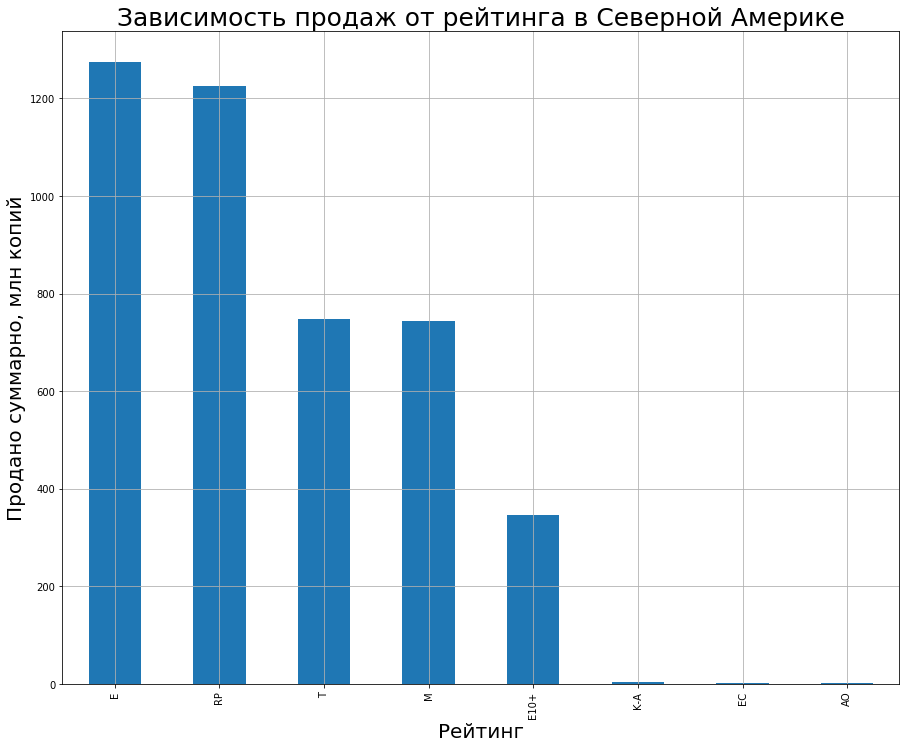

In [39]:
df_by_rating_na = df.query('na_sales != 0 ').groupby('rating')['na_sales'].sum().reset_index(
    ).sort_values(by = 'na_sales', ascending = False).reset_index().drop('index', axis = 1)
display(df_by_rating_na)
df_by_rating_na.plot(x = 'rating', kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Зависимость продаж от рейтинга в Северной Америке', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Рейтинг', size = 20)
plt.show()

,rating,eu_sales
0,E,703.87
1,RP,609.68
2,M,480.00
3,T,421.79
4,E10+,183.35
5,AO,0.61
6,K-A,0.27
7,EC,0.11


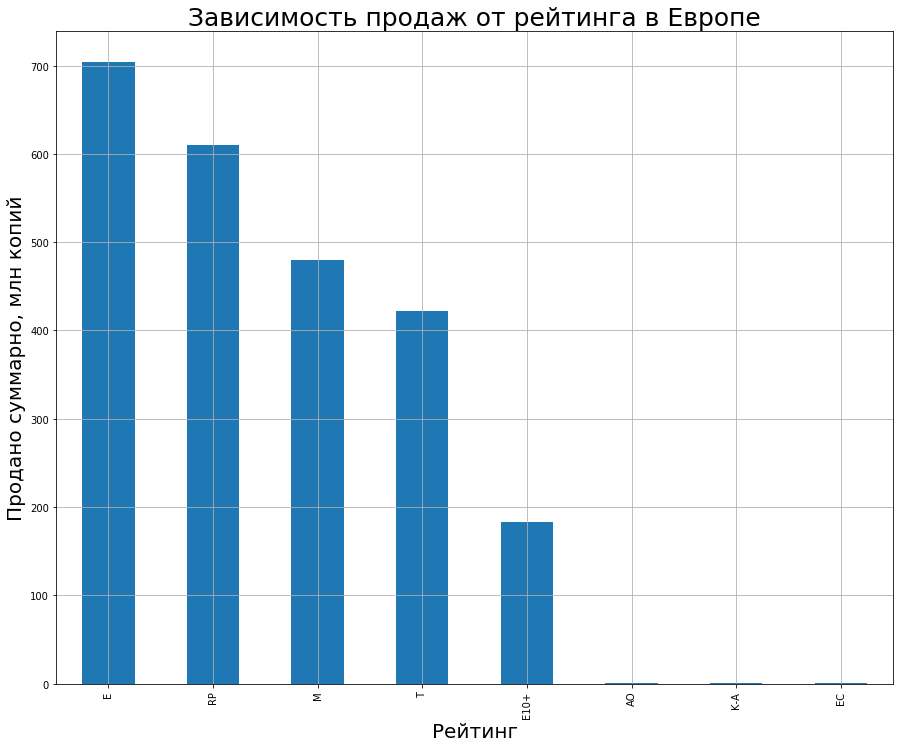

In [40]:
df_by_rating_eu = df.query('eu_sales !=0').groupby('rating')['eu_sales'].sum().reset_index(
    ).sort_values(by = 'eu_sales', ascending = False).reset_index().drop('index', axis = 1)
display(df_by_rating_eu)
df_by_rating_eu.plot(x = 'rating', kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Зависимость продаж от рейтинга в Европе', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Рейтинг', size = 20)
plt.show()

,rating,jp_sales
0,RP,836.74
1,E,197.96
2,T,150.70
3,M,63.58
4,E10+,40.20
5,K-A,1.46


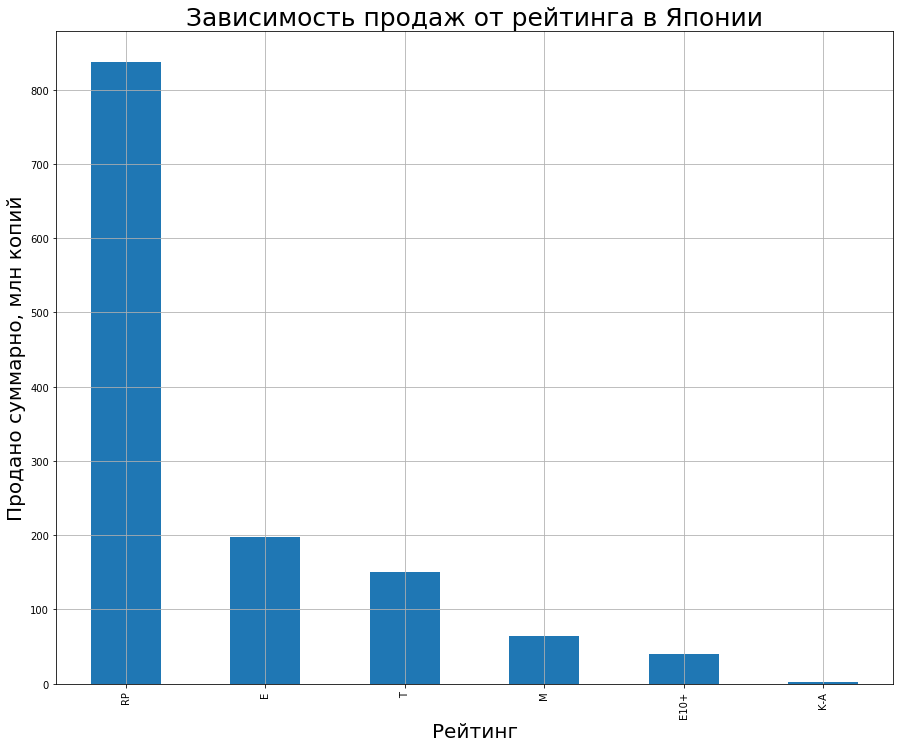

In [41]:
df_by_rating_jp = df.query('jp_sales !=0').groupby('rating')['jp_sales'].sum().reset_index(
    ).sort_values(by = 'jp_sales', ascending = False).reset_index().drop('index', axis = 1)
display(df_by_rating_jp)
df_by_rating_jp.plot(x = 'rating', kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Зависимость продаж от рейтинга в Японии', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Рейтинг', size = 20)
plt.show()

,rating,other_sales
0,E,231.54
1,M,176.06
2,T,152.99
3,RP,149.88
4,E10+,71.93
5,EC,0.11
6,AO,0.09
7,K-A,0.03


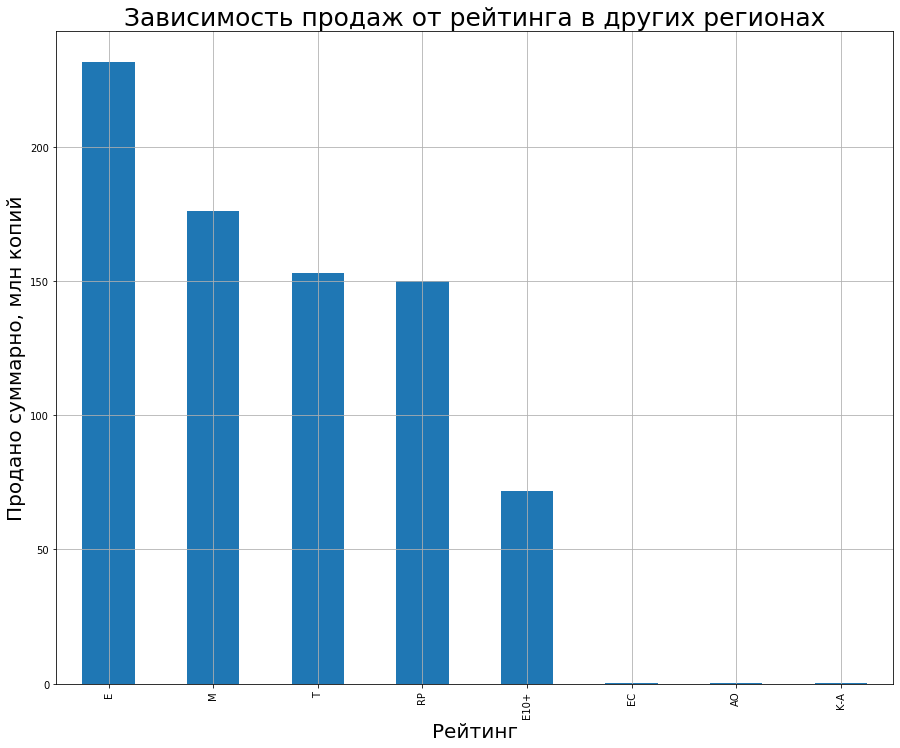

In [42]:
df_by_rating_other = df.query('other_sales !=0').groupby('rating')['other_sales'].sum().reset_index(
    ).sort_values(by = 'other_sales', ascending = False).reset_index().drop('index', axis = 1)
display(df_by_rating_other)
df_by_rating_other.plot(x = 'rating',  kind = 'bar', grid = True, legend = False, figsize = (15,12))
plt.title('Зависимость продаж от рейтинга в других регионах', loc = 'center', fontsize = 25)
plt.ylabel('Продано суммарно, млн копий', size = 20)
plt.xlabel('Рейтинг', size = 20)
plt.show()

Америка иметт картину аналогичную общей, как и Европа, Японцы не ценят насилие в играх, а в остальных регионах на второе место вырываются игры с рейтингом М(для взрослой аудитории). Интересная ситуация! Выходит, в не самых благополучных местах игроки предпочитают выпускать пар в компьютерных играх? Однако везде средний игрок предпочитает игру с рейтингом "Для всех". Возможно, ситуация сложилась таким образом еще и потому, что таких игр выпускают больше всего.

Что же касается неопределенного рейтинга, Япония снова отличилась - для этих игроков отсутствие рейтинга не помеха, а, как будто, наоборот, подстёгивающий фактор. Продажи таких игр лидируют. В Европе и Америке такие "игры-сюрпризы" любят меньше, но не пренебрегают, отнюдь. Игры с этим рейтингом на вторых местах по продажам. В остальных регионах такие игры тоже не обходят стороной, но уделяют чуть меньше внимания.

Чтож, теперь мы знаем, чем лучше всего удовлетворить спрос игроков из самых разных уголков нашей планеты и на что стоит сделать акцент, а что не стоит принимать во внимание. Осталось лишь проверить пару спорных моментов в следующем разделе, чтобы картина окончательно сложилась.

## Проверка гипотез

Первая гипотеза на повестке дня звучит так: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Сформулируем проверяемые гипотезы подробнее.

Нулевая гипотеза (Н0) - среднее значение в колонке user_score для платформ XBox One и ПК равны.

Альтернативная гипотеза (Н1) - среднее значение в колонке user_score для платформ XBox One и ПК отличается.


In [43]:
user_score_xboxone = df_normalised.query('platform == "XOne" and user_score !=0')
user_score_pc = df_normalised.query('platform == "PC" and user_score !=0')

In [44]:
alpha = 0.05

results = st.ttest_ind(user_score_xboxone['user_score'], user_score_pc['user_score'], equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отклонить нулевую гипотезу")


p-значение: 0.5535080500643661
Нет оснований отклонить нулевую гипотезу


Проверка показала, что у нас нет оснований отклонить нулевую гипотезу, а значит мы будем полагать, что средний оценки пользователей на XBox One и ПК равны.

Вторая гипотеза на проверку звучит так: Средние пользовательские рейтинги жанров экшн и спортивных игр разные. Но гипотеза должна всегда проверять равенство. Поэтому немного переформулируем её для корректности проверки и полученных выводов.

Нулевая гипотеза (Н0) - среднее значение в колонке user_score для жанров Action и Sports равны.

Альтернативная гипотеза (Н1) - среднее значение в колонке user_score для жанров Action и Sports отличается.

In [45]:
user_score_action = df_normalised.query('genre == "Action" and user_score !=0')
user_score_sports = df_normalised.query('genre == "Sports" and user_score !=0')

In [46]:
alpha = 0.05

results = st.ttest_ind(user_score_action['user_score'], user_score_sports['user_score'], equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отклонить нулевую гипотезу")


p-значение: 5.127237742321411e-25
Отвергаем нулевую гипотезу


Получается, что у нас нет оснований полагать, что средние пользовательские оценки для сравниваемых жанров равны, а значит изначально сформулированная гипотеза верна.

## Итог 

Подведем итоги. На что стоит обратить внимание для магазина компьютерных игр, чтобы сорвать куш в 2017м году? Приоритетным направлением будет определение региона, в котором будет проводиться рекламная компаний. Если в "среднем по миру" показатели одинаковые, то, например, Япония очень отличается от общей картины, для того, чтобы иметь максимальную прибыль в этом регионе стоит перестроить рекламный план и сместить упор на местные и портативные платформы поддерживающие как можно больше игр жанра РПГ и с меньшим уровнем насилия.

Европейцы предпочитают японские платформы, но в этот раз только стационарные. Там больше всего любят экшн. Ограничение по возрасту тут менее принципиально, игры с некоторым уровнем насилия пользуются немалым успехом. Жанровое предпочтение тут распределяется между стрелялками, экшенами и спортивными играми. 

Для американцев стоит обратить внимание на их предпочтение "своей" платформы (XBox), а так же на популярность продуктов от  Nintendo. К насилию в играх в Америке относятся спокойно, однако более спокойные релизы предпочитают чаще. И снова самыми популярными жанрами являются экшн и спортивные игры. 

Остальные регионы предпочитают игры поагрессивнее, но в остальном, популярность жанров в этих странах похожа на среднюю по миру. 

Кроме того, если рассмотреть популярность жанров подробнее, то выяснится, что добротный шутер продается лучше, чем экшн, но последние берут количеством. Если смотреть с этой точки зрения, то для американского изрока стоит учесть необходимость попадания платформеров в рекламную ротацию, так как Wii там достаточно популярен.

Не стоит уделять большого внимания отзывам критиков - как правильно, их мнение влияет только на отзывы игроков( и то, не в достаточно большой степени), а на продажи - не особо. Есть основания полагать, что самым прибыльным будет развитие направления игр для PS4. Добавил бы, что не стоит сбрасывать со счетов ПК, так как в отличие от игровых консолей эта платформа не имеет срока давности и проблем с совместимостью.